# Analysis of Covid-19 cases, deaths and vaccinations by country and WHO region

In [45]:
# Import the Required Libraries for visualiation, Dataframes and Calculations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
# Libaries for Machine Learning
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression, Lasso 
from sklearn.metrics import mean_squared_error

In [46]:
# Import Real World Datasets
vaccination_data = pd.read_csv(r"C:\Users\aoife\OneDrive\Documents\vaccine-data .csv", index_col = "COUNTRY")
vaccination_data


,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED
COUNTRY,,,,,,,,,,,
Afghanistan,AFG,EMRO,REPORTING,03/05/2023,16918550.0,14790567,43.0,38,14076220,36,11.0
Albania,ALB,EURO,REPORTING,09/04/2023,3075848.0,1347760,107.0,47,1277204,45,5.0
Algeria,DZA,AFRO,REPORTING,04/09/2022,15267442.0,7840131,35.0,18,6481186,15,4.0
American Samoa,ASM,WPRO,REPORTING,29/03/2023,114706.0,46206,208.0,84,42479,77,3.0
Andorra,AND,EURO,REPORTING,09/04/2023,157038.0,57910,203.0,76,53496,70,3.0
...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,VNM,WPRO,REPORTING,04/05/2023,266266588.0,90253541,274.0,93,85923905,88,6.0
Wallis and Futuna,WLF,WPRO,REPORTING,23/01/2023,17303.0,7150,154.0,64,6803,60,1.0
Yemen,YEM,EMRO,REPORTING,18/04/2023,1275368.0,1032545,4.0,3,788707,3,11.0


In [47]:
global_data = pd.read_csv(r"C:\Users\aoife\OneDrive\Documents\WHO-COVID-19-global-data(cleaned).csv", index_col= "Date_reported" )
global_data

,Country,Cumulative_cases,Cumulative_deaths
Date_reported,,,
03/01/2020,Afghanistan,0,0
04/01/2020,Afghanistan,0,0
05/01/2020,Afghanistan,0,0
06/01/2020,Afghanistan,0,0
07/01/2020,Afghanistan,0,0
...,...,...,...
06/05/2023,Zimbabwe,264685,5686
07/05/2023,Zimbabwe,264685,5686
08/05/2023,Zimbabwe,264776,5689


In [48]:
# Define a custom function to create reusable code

In [49]:
# Function for quick info
def snapshot_data(filename):
    data=filename
    print(data.head())
    print(data.index)
    print(data.info)
    
#Function to check datatypes    
def check_types(df): 
    data=df.dtypes
    print(data)
    
#Function to check for missing values
def missing_data(df):
    print(df.isna().sum().sort_values())    

In [50]:
# Use my custom functions to extract data

In [51]:
check_types(vaccination_data)

ISO3                                     object
WHO_REGION                               object
DATA_SOURCE                              object
DATE_UPDATED                             object
TOTAL_VACCINATIONS                      float64
PERSONS_VACCINATED_1PLUS_DOSE             int64
TOTAL_VACCINATIONS_PER100               float64
PERSONS_VACCINATED_1PLUS_DOSE_PER100      int64
PERSONS_FULLY_VACCINATED                  int64
PERSONS_FULLY_VACCINATED_PER100           int64
NUMBER_VACCINES_TYPES_USED              float64
dtype: object


In [52]:
check_types(global_data)

Country              object
Cumulative_cases      int64
Cumulative_deaths     int64
dtype: object


In [53]:
missing_data(vaccination_data)

ISO3                                    0
WHO_REGION                              0
DATA_SOURCE                             0
DATE_UPDATED                            0
PERSONS_VACCINATED_1PLUS_DOSE           0
PERSONS_VACCINATED_1PLUS_DOSE_PER100    0
PERSONS_FULLY_VACCINATED                0
PERSONS_FULLY_VACCINATED_PER100         0
TOTAL_VACCINATIONS                      1
TOTAL_VACCINATIONS_PER100               2
NUMBER_VACCINES_TYPES_USED              4
dtype: int64


In [54]:
missing_data(global_data)

Country              0
Cumulative_cases     0
Cumulative_deaths    0
dtype: int64


In [55]:
snapshot_data(vaccination_data)

               ISO3 WHO_REGION DATA_SOURCE DATE_UPDATED  TOTAL_VACCINATIONS  \
COUNTRY                                                                       
Afghanistan     AFG       EMRO   REPORTING   03/05/2023          16918550.0   
Albania         ALB       EURO   REPORTING   09/04/2023           3075848.0   
Algeria         DZA       AFRO   REPORTING   04/09/2022          15267442.0   
American Samoa  ASM       WPRO   REPORTING   29/03/2023            114706.0   
Andorra         AND       EURO   REPORTING   09/04/2023            157038.0   

                PERSONS_VACCINATED_1PLUS_DOSE  TOTAL_VACCINATIONS_PER100  \
COUNTRY                                                                    
Afghanistan                          14790567                       43.0   
Albania                               1347760                      107.0   
Algeria                               7840131                       35.0   
American Samoa                          46206                     

In [56]:
snapshot_data(global_data)

                   Country  Cumulative_cases  Cumulative_deaths
Date_reported                                                  
03/01/2020     Afghanistan                 0                  0
04/01/2020     Afghanistan                 0                  0
05/01/2020     Afghanistan                 0                  0
06/01/2020     Afghanistan                 0                  0
07/01/2020     Afghanistan                 0                  0
Index(['03/01/2020', '04/01/2020', '05/01/2020', '06/01/2020', '07/01/2020',
       '08/01/2020', '09/01/2020', '10/01/2020', '11/01/2020', '12/01/2020',
       ...
       '01/05/2023', '02/05/2023', '03/05/2023', '04/05/2023', '05/05/2023',
       '06/05/2023', '07/05/2023', '08/05/2023', '09/05/2023', '10/05/2023'],
      dtype='object', name='Date_reported', length=279072)
<bound method DataFrame.info of                    Country  Cumulative_cases  Cumulative_deaths
Date_reported                                                  
03/01/2020   

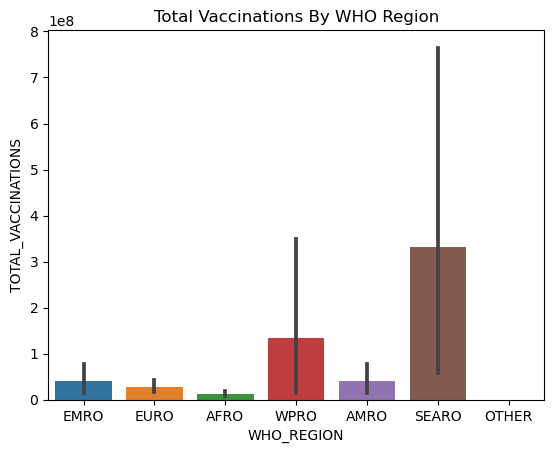

In [57]:
# Display Chart for EDA
sns.barplot(data=vaccination_data, x = "WHO_REGION", y= "TOTAL_VACCINATIONS")
plt.title("Total Vaccinations By WHO Region")
plt.show()

In [58]:
# Condensing data in the Global_Data Data Frame to include the Total Figure by deleting duplicates and keeping the cumulative
column_names = ["Country"]
duplicates = global_data.duplicated(subset=column_names, keep=False)

In [59]:
global_data.drop_duplicates(subset="Country", inplace = True, keep = "last")
print(global_data.shape)

(228, 3)


In [60]:
print(vaccination_data.shape) # Comparing shapes before merge

(228, 11)


In [61]:
print(global_data.head()) # Checking the duplicates have been removed

                      Country  Cumulative_cases  Cumulative_deaths
Date_reported                                                     
10/05/2023        Afghanistan            217361               7902
10/05/2023            Albania            334090               3604
10/05/2023            Algeria            271751               6881
10/05/2023     American Samoa              8331                 34
10/05/2023            Andorra             48015                159


In [62]:
# Merge Data Frames to create new Data Frame, then remove unnecessary data

In [63]:
Covid_19_data = vaccination_data.merge(global_data, how='outer', left_on=['COUNTRY'], right_on=['Country'])
Covid_19_data

,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,Country,Cumulative_cases,Cumulative_deaths
0,AFG,EMRO,REPORTING,03/05/2023,16918550.0,14790567.0,43.0,38.0,14076220.0,36.0,11.0,Afghanistan,217361.0,7902.0
1,ALB,EURO,REPORTING,09/04/2023,3075848.0,1347760.0,107.0,47.0,1277204.0,45.0,5.0,Albania,334090.0,3604.0
2,DZA,AFRO,REPORTING,04/09/2022,15267442.0,7840131.0,35.0,18.0,6481186.0,15.0,4.0,Algeria,271751.0,6881.0
3,ASM,WPRO,REPORTING,29/03/2023,114706.0,46206.0,208.0,84.0,42479.0,77.0,3.0,American Samoa,8331.0,34.0
4,AND,EURO,REPORTING,09/04/2023,157038.0,57910.0,203.0,76.0,53496.0,70.0,3.0,Andorra,48015.0,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,ZMB,AFRO,REPORTING,09/04/2023,13614983.0,11637730.0,74.0,63.0,9147920.0,50.0,3.0,Zambia,343911.0,4058.0
227,ZWE,AFRO,REPORTING,30/04/2023,13935112.0,7194886.0,94.0,48.0,5381080.0,36.0,4.0,Zimbabwe,264776.0,5689.0
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Curaçao,45812.0,302.0
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kosovo[1],273872.0,3206.0


In [64]:
# Missing Values

# Recommended Threshold of 5%
threshold = len(Covid_19_data) * 0.05
cols_2_drop = Covid_19_data.columns[Covid_19_data.isna().sum() <= threshold]

# Drop missing values for columns below the Threshold
Covid_19_data.dropna(subset=cols_2_drop, inplace=True)

print(Covid_19_data.isna().sum())

ISO3                                    0
WHO_REGION                              0
DATA_SOURCE                             0
DATE_UPDATED                            0
TOTAL_VACCINATIONS                      0
PERSONS_VACCINATED_1PLUS_DOSE           0
TOTAL_VACCINATIONS_PER100               0
PERSONS_VACCINATED_1PLUS_DOSE_PER100    0
PERSONS_FULLY_VACCINATED                0
PERSONS_FULLY_VACCINATED_PER100         0
NUMBER_VACCINES_TYPES_USED              0
Country                                 0
Cumulative_cases                        0
Cumulative_deaths                       0
dtype: int64


In [65]:
# For consistency changing  all column names to uppercase
Covid_19_data.columns = Covid_19_data.columns.str.upper()

In [66]:
Covid_19_data.columns

Index(['ISO3', 'WHO_REGION', 'DATA_SOURCE', 'DATE_UPDATED',
       'TOTAL_VACCINATIONS', 'PERSONS_VACCINATED_1PLUS_DOSE',
       'TOTAL_VACCINATIONS_PER100', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100',
       'PERSONS_FULLY_VACCINATED', 'PERSONS_FULLY_VACCINATED_PER100',
       'NUMBER_VACCINES_TYPES_USED', 'COUNTRY', 'CUMULATIVE_CASES',
       'CUMULATIVE_DEATHS'],
      dtype='object')

In [67]:
# Change to category datatype
Covid_19_data["COUNTRY"] = Covid_19_data["COUNTRY"].astype("category")
Covid_19_data["ISO3"] = Covid_19_data["ISO3"].astype("category")
Covid_19_data["DATA_SOURCE"] = Covid_19_data["DATA_SOURCE"].astype("category")
Covid_19_data["WHO_REGION"] = Covid_19_data["WHO_REGION"].astype("category") 

In [68]:
# Change to in datatype
Covid_19_data["PERSONS_FULLY_VACCINATED"] = Covid_19_data["PERSONS_FULLY_VACCINATED"].astype("int")  
Covid_19_data["NUMBER_VACCINES_TYPES_USED"] = Covid_19_data["NUMBER_VACCINES_TYPES_USED"].astype("int") 
Covid_19_data["CUMULATIVE_CASES"] = Covid_19_data["CUMULATIVE_CASES"].astype("int") 
Covid_19_data["CUMULATIVE_DEATHS"] = Covid_19_data["CUMULATIVE_DEATHS"].astype("int") 
Covid_19_data["PERSONS_VACCINATED_1PLUS_DOSE"] = Covid_19_data["PERSONS_VACCINATED_1PLUS_DOSE"].astype("int") 
Covid_19_data["TOTAL_VACCINATIONS_PER100"] = Covid_19_data["TOTAL_VACCINATIONS_PER100"].astype("int") 
Covid_19_data["PERSONS_VACCINATED_1PLUS_DOSE_PER100"] = Covid_19_data["PERSONS_VACCINATED_1PLUS_DOSE_PER100"].astype("int") 
Covid_19_data["PERSONS_FULLY_VACCINATED_PER100"] = Covid_19_data["PERSONS_FULLY_VACCINATED_PER100"].astype("int")


In [69]:
# Review Data Frame
Covid_19_data.head()

,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,COUNTRY,CUMULATIVE_CASES,CUMULATIVE_DEATHS
0,AFG,EMRO,REPORTING,03/05/2023,16918550.0,14790567,43,38,14076220,36,11,Afghanistan,217361,7902
1,ALB,EURO,REPORTING,09/04/2023,3075848.0,1347760,107,47,1277204,45,5,Albania,334090,3604
2,DZA,AFRO,REPORTING,04/09/2022,15267442.0,7840131,35,18,6481186,15,4,Algeria,271751,6881
3,ASM,WPRO,REPORTING,29/03/2023,114706.0,46206,208,84,42479,77,3,American Samoa,8331,34
4,AND,EURO,REPORTING,09/04/2023,157038.0,57910,203,76,53496,70,3,Andorra,48015,159


In [70]:
Covid_19_data.shape

(220, 14)

In [71]:
check_types(Covid_19_data)

ISO3                                    category
WHO_REGION                              category
DATA_SOURCE                             category
DATE_UPDATED                              object
TOTAL_VACCINATIONS                       float64
PERSONS_VACCINATED_1PLUS_DOSE              int32
TOTAL_VACCINATIONS_PER100                  int32
PERSONS_VACCINATED_1PLUS_DOSE_PER100       int32
PERSONS_FULLY_VACCINATED                   int32
PERSONS_FULLY_VACCINATED_PER100            int32
NUMBER_VACCINES_TYPES_USED                 int32
COUNTRY                                 category
CUMULATIVE_CASES                           int32
CUMULATIVE_DEATHS                          int32
dtype: object


In [72]:
Covid_19_data.tail()

,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,COUNTRY,CUMULATIVE_CASES,CUMULATIVE_DEATHS
223,VNM,WPRO,REPORTING,04/05/2023,266266588.0,90253541,274,93,85923905,88,6,Viet Nam,11575883,43196
224,WLF,WPRO,REPORTING,23/01/2023,17303.0,7150,154,64,6803,60,1,Wallis and Futuna,3427,7
225,YEM,EMRO,REPORTING,18/04/2023,1275368.0,1032545,4,3,788707,3,11,Yemen,11945,2159
226,ZMB,AFRO,REPORTING,09/04/2023,13614983.0,11637730,74,63,9147920,50,3,Zambia,343911,4058
227,ZWE,AFRO,REPORTING,30/04/2023,13935112.0,7194886,94,48,5381080,36,4,Zimbabwe,264776,5689


In [73]:
# Data Exploration

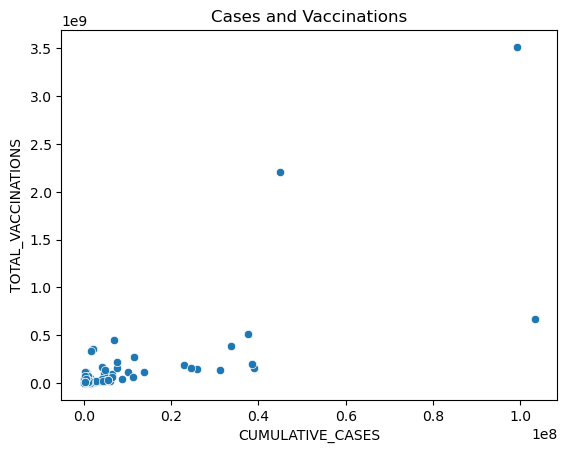

In [76]:
sns.scatterplot(data=Covid_19_data, x = "CUMULATIVE_CASES", y = "TOTAL_VACCINATIONS")
plt.title("Cases and Vaccinations")
plt.show()

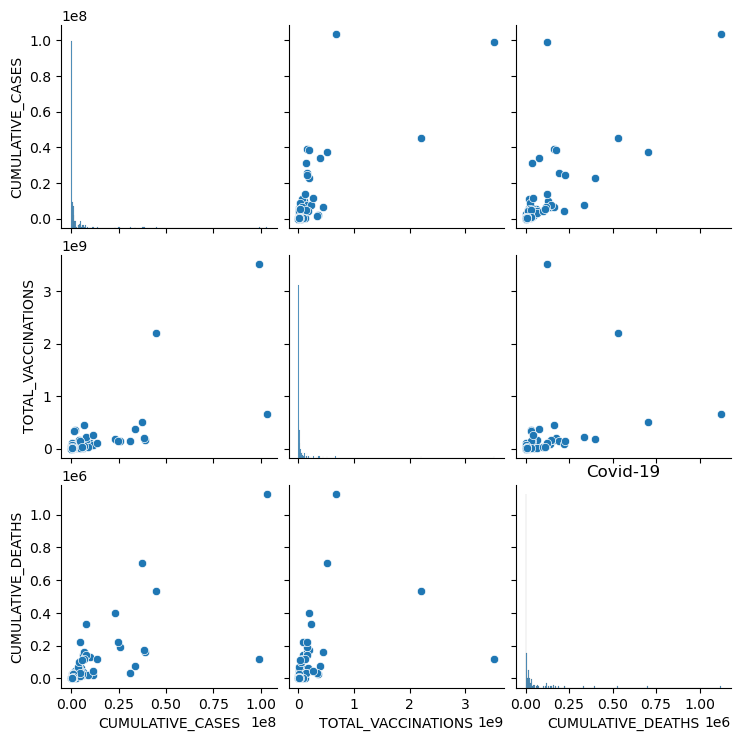

In [75]:
sns.pairplot(data=Covid_19_data, vars=["CUMULATIVE_CASES", "TOTAL_VACCINATIONS", "CUMULATIVE_DEATHS"])
plt.title("Covid-19")
plt.show()

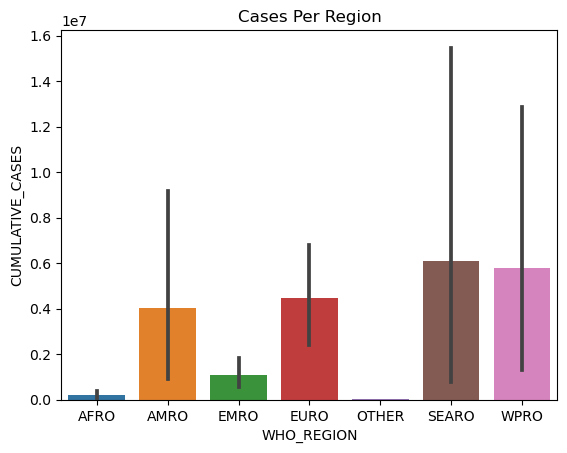

In [78]:
sns.barplot(data=Covid_19_data, x="WHO_REGION", y="CUMULATIVE_CASES")
plt.title("Cases Per Region")
plt.show()

In [79]:
plt.figure(num=None, figsize=(20,100), dpi=256, facecolor='w', edgecolor='r')
sns.barplot(data=Covid_19_data, x="CUMULATIVE_CASES", y="ISO3")
plt.title("Cumulative Cases Per Country")
plt.show()

In [80]:
#Create a list or Dictionary

In [81]:
Country_list = Covid_19_data["ISO3"].to_list()
WHO_Region_List = Covid_19_data["WHO_REGION"].to_list()

In [82]:
# using zip() to convert lists to dictionary
WHO_Regions_Dict = dict(zip(Country_list, WHO_Region_List))
print(WHO_Regions_Dict)

{'AFG': 'EMRO', 'ALB': 'EURO', 'DZA': 'AFRO', 'ASM': 'WPRO', 'AND': 'EURO', 'AGO': 'AFRO', 'AIA': 'AMRO', 'ATG': 'AMRO', 'ARG': 'AMRO', 'ARM': 'EURO', 'ABW': 'AMRO', 'AUS': 'WPRO', 'AUT': 'EURO', 'AZE': 'EURO', 'BHS': 'AMRO', 'BHR': 'EMRO', 'BGD': 'SEARO', 'BRB': 'AMRO', 'BLR': 'EURO', 'BEL': 'EURO', 'BLZ': 'AMRO', 'BEN': 'AFRO', 'BMU': 'AMRO', 'BTN': 'SEARO', 'BOL': 'AMRO', 'BIH': 'EURO', 'BWA': 'AFRO', 'BRA': 'AMRO', 'VGB': 'AMRO', 'BRN': 'WPRO', 'BGR': 'EURO', 'BFA': 'AFRO', 'BDI': 'AFRO', 'CPV': 'AFRO', 'KHM': 'WPRO', 'CMR': 'AFRO', 'CAN': 'AMRO', 'CYM': 'AMRO', 'CAF': 'AFRO', 'TCD': 'AFRO', 'CHL': 'AMRO', 'CHN': 'WPRO', 'COL': 'AMRO', 'COM': 'AFRO', 'COG': 'AFRO', 'COK': 'WPRO', 'CRI': 'AMRO', 'CIV': 'AFRO', 'HRV': 'EURO', 'CUB': 'AMRO', 'CYP': 'EURO', 'CZE': 'EURO', 'COD': 'AFRO', 'DNK': 'EURO', 'DJI': 'EMRO', 'DMA': 'AMRO', 'DOM': 'AMRO', 'ECU': 'AMRO', 'EGY': 'EMRO', 'SLV': 'AMRO', 'GNQ': 'AFRO', 'EST': 'EURO', 'SWZ': 'AFRO', 'ETH': 'AFRO', 'FLK': 'AMRO', 'FRO': 'EURO', 'FJI': 

In [83]:
# Machine Learning

In [84]:
Covid_19_for_model = Covid_19_data.drop(['DATA_SOURCE', 'ISO3', 'DATE_UPDATED', 'WHO_REGION'], axis=1)
Covid_19_for_model

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,COUNTRY,CUMULATIVE_CASES,CUMULATIVE_DEATHS
0,16918550.0,14790567,43,38,14076220,36,11,Afghanistan,217361,7902
1,3075848.0,1347760,107,47,1277204,45,5,Albania,334090,3604
2,15267442.0,7840131,35,18,6481186,15,4,Algeria,271751,6881
3,114706.0,46206,208,84,42479,77,3,American Samoa,8331,34
4,157038.0,57910,203,76,53496,70,3,Andorra,48015,159
...,...,...,...,...,...,...,...,...,...,...
223,266266588.0,90253541,274,93,85923905,88,6,Viet Nam,11575883,43196
224,17303.0,7150,154,64,6803,60,1,Wallis and Futuna,3427,7
225,1275368.0,1032545,4,3,788707,3,11,Yemen,11945,2159
226,13614983.0,11637730,74,63,9147920,50,3,Zambia,343911,4058


In [85]:
# Use pd.get_dummies to change the remaining categorical data 
Df_with_Dummies = pd.get_dummies(Covid_19_for_model, drop_first=True)
print(Df_with_Dummies.columns)

Index(['TOTAL_VACCINATIONS', 'PERSONS_VACCINATED_1PLUS_DOSE',
       'TOTAL_VACCINATIONS_PER100', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100',
       'PERSONS_FULLY_VACCINATED', 'PERSONS_FULLY_VACCINATED_PER100',
       'NUMBER_VACCINES_TYPES_USED', 'CUMULATIVE_CASES', 'CUMULATIVE_DEATHS',
       'COUNTRY_Albania',
       ...
       'COUNTRY_United States of America', 'COUNTRY_Uruguay',
       'COUNTRY_Uzbekistan', 'COUNTRY_Vanuatu',
       'COUNTRY_Venezuela (Bolivarian Republic of)', 'COUNTRY_Viet Nam',
       'COUNTRY_Wallis and Futuna', 'COUNTRY_Yemen', 'COUNTRY_Zambia',
       'COUNTRY_Zimbabwe'],
      dtype='object', length=228)


In [86]:
# Use Model and train_test_split

X = Df_with_Dummies.drop("TOTAL_VACCINATIONS", axis=1).values 

y = Df_with_Dummies["TOTAL_VACCINATIONS"].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

linreg =LinearRegression()

linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf, 
                            scoring="neg_mean_squared_error")

print(np.sqrt(-linreg_cv))

[7.02306162e+06 8.01391192e+07 6.54685593e+06 3.24655637e+07
 7.26267981e+06 8.28628053e+06 1.04771349e+07 1.58632220e+08
 4.74060799e+07 4.80355617e+06]


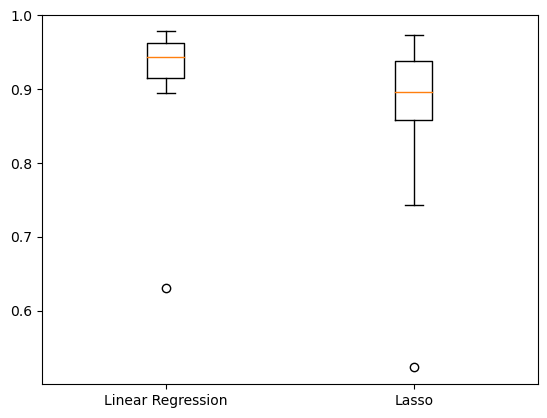

In [87]:
# Testing Different Models
models = {"Linear Regression": LinearRegression(), "Lasso": Lasso(alpha=10.0)}
results = []

# Use a for loop
for model in models.values():
  kf = KFold(n_splits=10, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

In [89]:
# Try Different Variables

# Create X and y
X = Df_with_Dummies["CUMULATIVE_CASES"].values
y = Df_with_Dummies["CUMULATIVE_DEATHS"].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(220, 1) (220,)


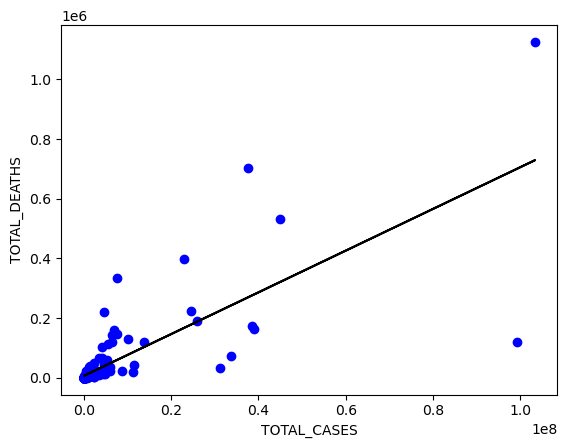

In [90]:
# Create the new Regression model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="black")
plt.xlabel("TOTAL_CASES")
plt.ylabel("TOTAL_DEATHS")

# Display the plot
plt.show()

In [91]:
# Predictions

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [12140.21346575 19861.30638382], Actual Values: [   8 5435]


In [92]:
# R-squared
r_squared = reg.score(X_test, y_test)

# RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Results
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.659051846435192
RMSE: 84979.95912408402
